In [2]:
import random, math

from typing import List, Tuple

# Лабораторная работа 1. Методы сортировки

Вариант: 5

## Шейкерная сортировка (shaker sort)

Другие названия: 

- Сортировка перемешиванием

- Двунаправленная сортировка

### Классификация алгоритма:

- По типу алгоритма: обменная сортировка

- По устойчивости: устойчивый

- По месту хранения данных: на месте

- По выделению дополнительного пространства: сортировка на месте

- По дополнительным затратам памяти: $O(1)$
   
- Время выполнения: 
  
  - В худшем случае: $O(n^2)$
  
  - В лучшем случае: $O(n)$
  
  - В среднем: $O(n^2)$

### Описание алгоритма:

В рамках шейкерной сортировки (shaker sort) выполняются следующие действия:  
Перестановка элементов в шейкерной сортировке выполняется аналогично той же в пузырьковой сортировке, т. е. два соседних элемента, при необходимости, меняются местами. Пусть массив требуется упорядочить по возрастанию. Обозначим каждый пройденный путь от начала до конца последовательности через $Wi$, где $i$ – номер пути; а обратный путь (от конца к началу) через $—Wj$, где $j$ – номер пути.

Тогда после выполнения $Wi$, один из неустановленных элементов будет помещен в позицию справа, как наибольший из еще неотсортированных элементов, а после выполнения —$Wj$, наименьший из неотсортированных, переместиться в некоторую позицию слева. Так, например, после выполнения $W1$ в конце массива окажется элемент, имеющий наибольшее значение, а после $—W1$ в начало отправиться элемент с наименьшим значением.

### Блок-схема алгоритма


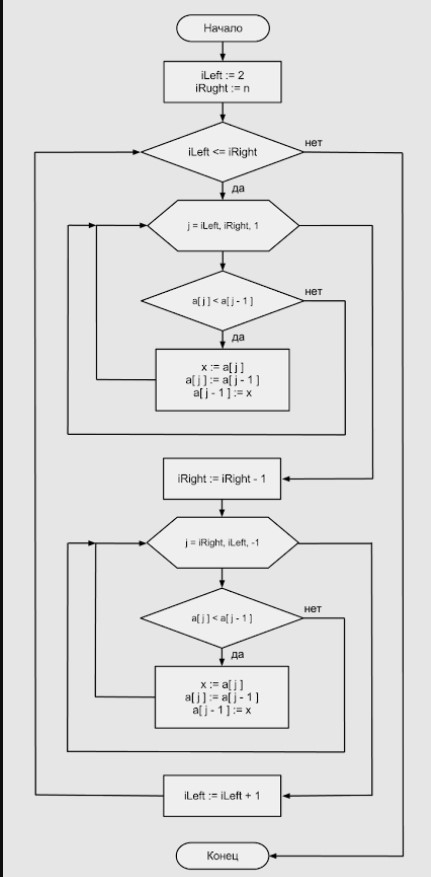

### Псевдокод алгоритма

```
FOR i=0 TO n-1 STEP 1
  is_swap = False
  FOR j=1 TO n-i STEP 1
    IF x[j]>x[j+1] THEN 
      is_swap = True
      tmp = x[j]
      x[j] = x[j+1]
      x[j+1] = tmp
  NEXT j
  IF is_swap == False THEN EXIT FOR
NEXT i
FOR n-1 TO i=0 STEP 1
  is_swap = False
  FOR j=1 TO n-i STEP 1
    IF x[j]>x[j+1] THEN 
      is_swap = True
      tmp = x[j]
      x[j] = x[j+1]
      x[j+1] = tmp
  NEXT j
  IF is_swap == False THEN EXIT FOR
NEXT i
```


### Реализация алгоритма

Достоинства алгоритма:
    
    -- простота реализации
    
Недостатки:

    -- низкая эффективность

In [19]:
import random, math


def shaker(data):
    up = range(len(data) - 1)
    while True:
        for indices in (up, reversed(up)):
            swapped = False
            for i in indices:
                if data[i] > data[i + 1]:
                    data[i], data[i + 1] = data[i + 1], data[i]
                    swapped = True
            if not swapped:
                return data
            
### Тестирование программы

sortmethod = shaker

assert sortmethod([1, 2, 3, 4]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного массива'

assert sortmethod([4, 3, 2, 1]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного в обратном порядке массива'

assert sortmethod([1, 3, 4, 2]) == [1, 2, 3, 4], 'Ошибка при сортировки произвольного массива'

assert sortmethod([1, 3, 1, 2]) == [1, 1, 2, 3], 'Ошибка при сортировки массива с повторящимися элементами'


array_1000 = list(range(1, 1000))
array_5000 = list(range(1, 5000))
array_8000 = list(range(1, 8000))
array_10000 = list(range(1, 10000))


In [ ]:
%%time
shaker(array_1000)
shaker(array_1000[::-1])
shaker(random.sample(array_1000, len(array_1000)))

In [ ]:
%%time
shaker(array_5000)
shaker(array_5000[::-1])
shaker(random.sample(array_5000, len(array_5000)))

In [ ]:
%%time
shaker(array_8000)
shaker(array_8000[::-1])
shaker(random.sample(array_8000, len(array_8000)))

In [ ]:
%%time
shaker(array_10000)
shaker(array_10000[::-1])
shaker(random.sample(array_10000, len(array_10000)))

### Ручная трассировка
Шейкерная сортировка - это улучшенная версия пузырьковой сортировки, которая двигается по списку в обе стороны. 
Она начинается с начала списка, двигается до конца, затем переключается и двигается обратно до начала, и так далее, до тех пор, пока список не будет отсортирован.

Вот пример трассировки шейкерной сортировки на списке [2, 1, 6, 7]:

##### Итерация 1:

Начальный список: [2, 1, 6, 7]
- Сравниваем 2 и 1, переставляем элементы: [1, 2, 6, 7]
- Сравниваем 2 и 6, элементы не нуждаются в перестановке: [1, 2, 6, 7]
- Сравниваем 6 и 7, элементы не нуждаются в перестановке: [1, 2, 6, 7]
- Конец первой итерации, результат: [1, 2, 6, 7]

##### Итерация 2:

Начальный список: [1, 2, 6, 7]
 - Сравниваем 1 и 2, элементы не нуждаются в перестановке: [1, 2, 6, 7]
 - Сравниваем 2 и 6, элементы не нуждаются в перестановке: [1, 2, 6, 7]
 - Сравниваем 6 и 7, элементы не нуждаются в перестановке: [1, 2, 6, 7]
 - Конец второй итерации, результат: [1, 2, 6, 7]

Как видно из примера, шейкерная сортировка на этом списке отсортировала его после двух итераций.

In [20]:
from typing import List

def shakersort(X: List) -> List:
    """Шейкерная сортировка"""
    n = len(X)
    left = 0
    right = n - 1
    while left <= right:
        for i in range(left, right):
            print_swap(X, i, i+1)
            if X[i] > X[i+1]:
                X[i], X[i+1] = X[i+1], X[i]
        right -= 1
        for i in range(right, left, -1):
            print_swap(X, i-1, i)
            if X[i-1] > X[i]:
                X[i-1], X[i] = X[i], X[i-1]
        left += 1
    return X

def print_swap(A, i, j):
    '''Иллюстрация обмена элементов'''
    s = [f' {str(a):<3}' for a in A]
    s[i] = f'<{s[i].strip()}>'
    s[j] = f'<{s[j].strip()}>'
    s = ' '.join(s)
    I = s.find('<')
    J = s.rfind('>') - I - 3
    swap_str = ' ' + ' '*I + '^' + '-'*J + '^'
    print(s)
    print(swap_str, end='\n\n\n')


A = [5, 8, 12, 7, 6]
A = shakersort(A)


<5> <8>  12   7    6  
 ^---^


 5   <8> <12>  7    6  
      ^----^


 5    8   <12> <7>  6  
           ^----^


 5    8    7   <12> <6>
                ^----^


 5    8   <7> <6>  12 
           ^---^


 5   <8> <6>  7    12 
      ^---^


<5> <6>  8    7    12 
 ^---^


 5   <6> <8>  7    12 
      ^---^


 5    6   <8> <7>  12 
           ^---^


 5   <6> <7>  8    12 
      ^---^




### Литература

Роберт Седжвик. Фундаментальные алгоритмы на C. Анализ/Структуры данных/Сортировка/Поиск = Algorithms in C. Fundamentals/Data Structures/Sorting/Searching. — СПб.: ДиаСофтЮП, 2003. — С. 672. — ISBN 5-93772-081-4.

https://ru.overleaf.com/learn/latex/LaTeX_Graphics_using_TikZ%3A_A_Tutorial_for_Beginners_(Part_3)%E2%80%94Creating_Flowcharts

https://www.ctan.org/pkg/nassflow